### Data Analyse

In [1]:
import sys
sys.path.insert(0, '/Users/florianrunkel/Documents/02_Uni/04_Masterarbeit/masterthesis/')

from backend.ml_pipe.data.dataModule.gru.dataModule import DataModule
from backend.ml_pipe.models.gru.model import GRUModel
from backend.ml_pipe.data.database.mongodb import MongoDb
import pandas as pd

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# MongoDB-Client
mongo_client = MongoDb()
result = mongo_client.get_all('timeseries_dataset')
raw_data = result.get('data', [])


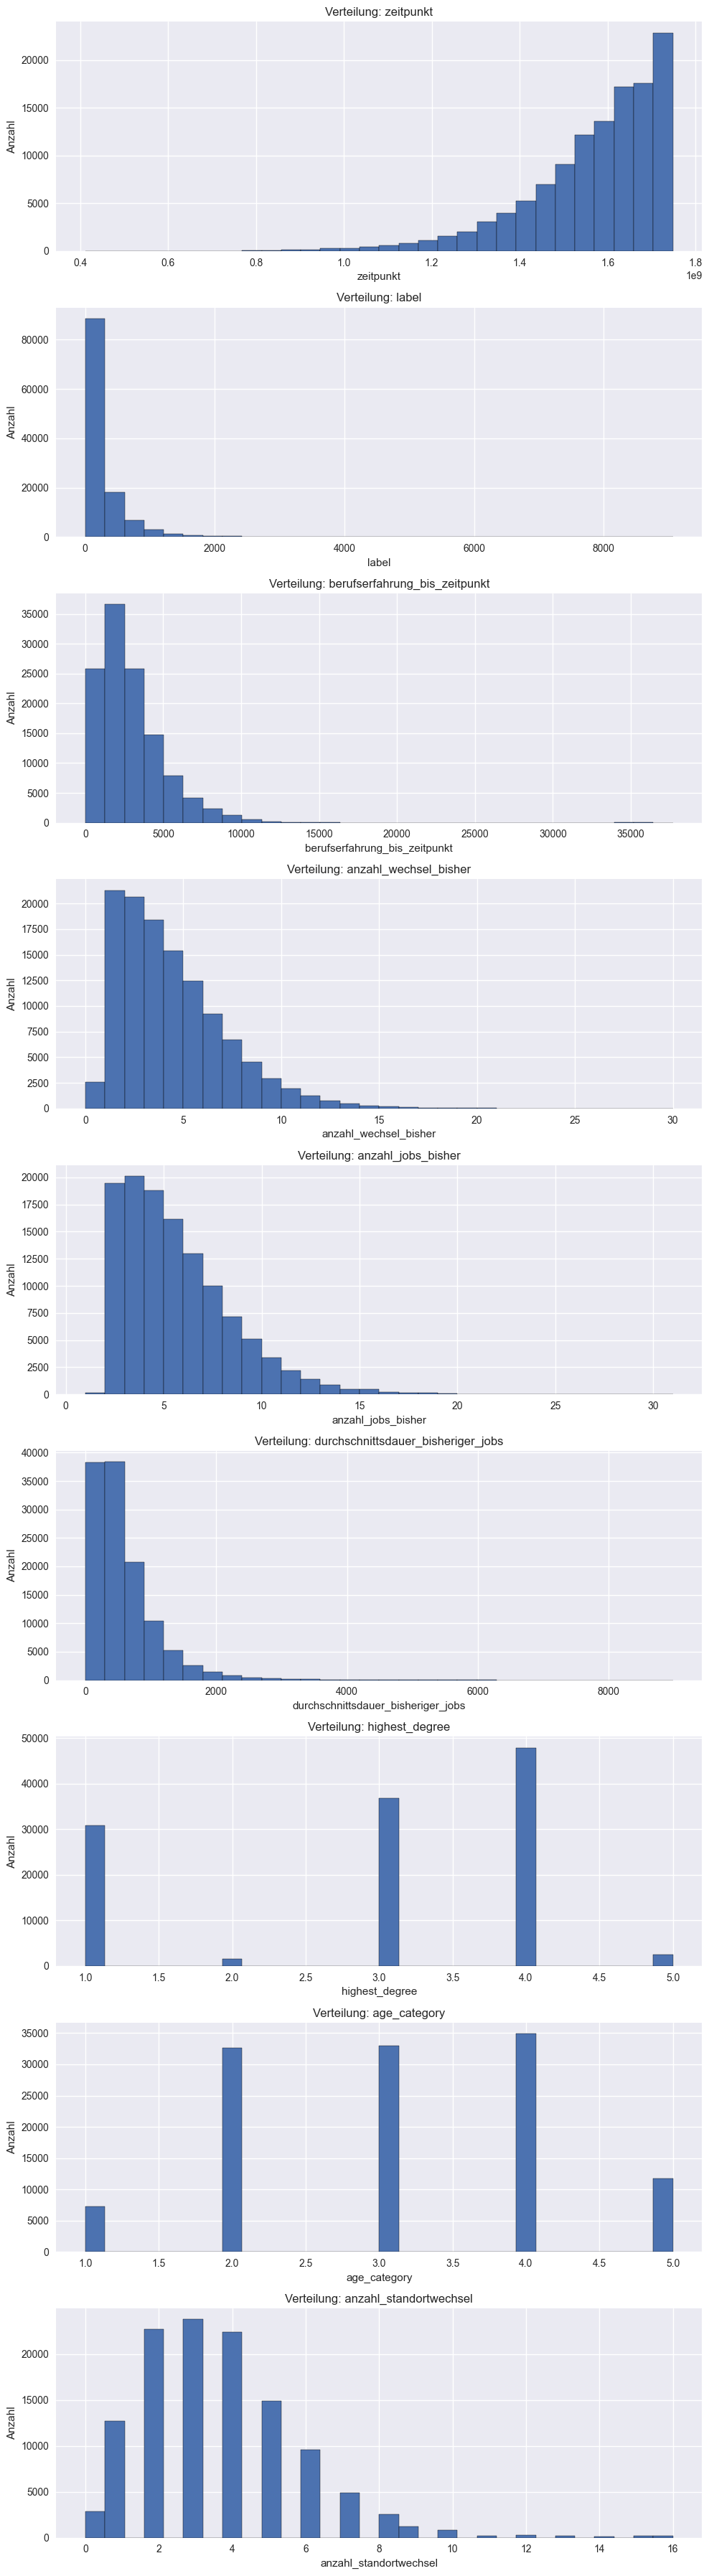

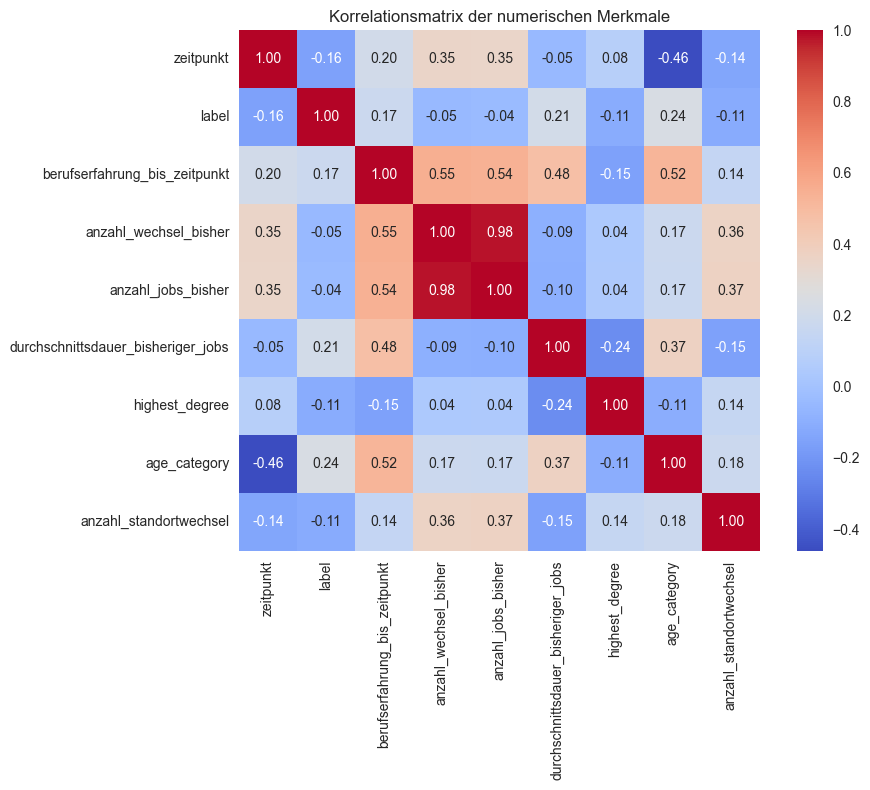

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(raw_data)

numerische_spalten = df.select_dtypes(include=['number']).columns.tolist()

plt.style.use("seaborn-v0_8")
fig, axes = plt.subplots(nrows=len(numerische_spalten), figsize=(10, 4 * len(numerische_spalten)))
if len(numerische_spalten) == 1:
    axes = [axes]

for ax, col in zip(axes, numerische_spalten):
    ax.hist(df[col].dropna(), bins=30, edgecolor='black')
    ax.set_title(f"Verteilung: {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Anzahl")
    ax.grid(True)

plt.tight_layout()
plt.show()

correlation_matrix = df[numerische_spalten].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Korrelationsmatrix der numerischen Merkmale")
plt.tight_layout()
plt.show()